# ANALYSIS FOR MICROSOFT'S NEW MOVIE STUDIO

### Overview
The main objective of this chapter is to provide an overview of the current state of research on the topic. 
Microsoft is taking a giant leap into the entertainment industry with a new movie studio. But before it does, they need strategic insights for a successful venture. I have been tasked to leverage data insights to guide their new venture. This project will strongly be aided by  performing exploratory data analysis and the focus will be understanding the performance dynamics of movie genres, release dates and budgets in order to derive actionable recommendations for the strategic planning of Microsoft's new movie studio. 
To achieve this, my analysis will follow this structured approach:
1. Data Collection where I will compile the relevant datasets from different data sources that include the movie genres, dates of release and budgets.
2. Exploratory Data Analysis (EDA) to identify general patterns in the data.
3. Recommendations.

### Business Understanding for Microsoft's new movie studio
Since Microsoft is new to the industry, I have identified the key problems that need to be addressed so that the new business venture can be a success.

This analysis will be based on the following factors:
1. Which genres peform well in the film industry? Perform analysis to determine which genres are profitable and have a high demand. This will help Microsoft to focus on the right genre to invest in.
2. Is there a correlation between a film budget and the revenue? Analyse thr relationship between  the budget and revenue of a film to determine if investing in high budget films is profitable. This will help Microsoft to determine the budget for their films.
3. What are the trends? Is there any particular time of the year that is more profitable for film release? Identify profitable film release windows by analysing historical release dates.



## Data Understanding
The data I am going to use for this analysis are from the following sources:
1. bom.movie_gross.csv.gz, box office mojo that has the gross earnings of the movies.
2. tmdb.movies.csv.gz that contain data about the release dates of the movies.
3. rt.movie_info.tsv.gz that contain the genre of the movies.
4. tn movies that has information about gross earnings.


### Data Preparation
In this part, I prepared my data by importing and viewing the datasets. I handled cleaning of the data so as to make it more reliable and accurate.
The steps I used to clean the data are Data Collection and Initial Review where i gathered the data from various sources such as spreadsheets and the carried out initial assessment to understand the structure of the data and notice any inconsistensies. I then Handled Missing Data that could skew the analysis if left in the data,  I Removed any Duplicates to avaoid repitition of the data and lastly Correcting Inconsistencies and Standardizing Data such as standardizing column names and dates.


In [2]:
#imporring the libraries
import numpy as np
import pandas as pd

#### Working on bom.movie_gross.csv.gz file

In [3]:
#importing the bom dataset
bom_movies = pd.read_csv(r"C:\Users\hp\Documents\phase-1-project\zippedData\zippedData\bom.movie_gross.csv.gz")

#viewing the rows of the dataset
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
#checking for missing values
bom_movies.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
#dropping any duplicate values
bom_movies = bom_movies.drop_duplicates()

#dropping columns with missing values
bom_movies = bom_movies.dropna()

#Converting columns to numerical data
cols_to_convert = ['foreign_gross', 'domestic_gross']
for col in cols_to_convert:
    bom_movies[col] = bom_movies[col] = bom_movies[col].astype(str).str.replace('[$,]', '', regex=True).astype(float)
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [7]:
#verifying and validating the data
bom_movies.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### Working on the rt.movie_info.tsv.gz

In [11]:
#accessing the file
rt_movies = pd.read_csv(r"zippedData/zippedData/rt.movie_info.tsv.gz", sep='\t')

#viewing the dataset
rt_movies

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [12]:
#checking for any missing values
rt_movies.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [17]:
# Dropping columns that are not significant for this analysis
columns_to_drop = ['box_office', 'studio', 'currency', 'id', 'theater_date', 'dvd_date']
rt_movies = rt_movies.drop(columns=columns_to_drop)

# Dropping any duplicates in the dataset
rt_movies = rt_movies.drop_duplicates()

# Dropping all rows with missing values
rt_movies = rt_movies.dropna()

In [18]:
rt_movies

,synopsis,rating,genre,director,writer,runtime
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,104 minutes
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,108 minutes
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,116 minutes
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,128 minutes
5,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,95 minutes
...,...,...,...,...,...,...
1550,A hard-working Sicilian heads for Switzerland ...,R,Art House and International|Comedy|Drama,Franco Brusati,Nino Manfredi|Franco Brusati|Iaia Fiastri,112 minutes
1551,Popular rap group Run DMC stars as a trio of p...,R,Action and Adventure|Drama,Rick Rubin,Rick Rubin|Ric Menello,92 minutes
1552,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,116 minutes
1556,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,88 minutes


#### Working on tmdb.movies.csv

In [20]:
#loading the dataset
tmdb = pd.read_csv(r"C:\Users\hp\Documents\phase-1-project\zippedData\zippedData\tmdb.movies.csv.gz")

#viewing the file
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [21]:
#checking for any missing values
tmdb.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [23]:
#dropping unnessesary columns
cols_to_drop = ['vote_count', 'genre_ids', 'vote_average', 'Unnamed: 0']
tmdb = tmdb.drop(columns=cols_to_drop)

In [25]:
tmdb

,id,original_language,original_title,popularity,release_date,title
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon
2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2
3,862,en,Toy Story,28.005,1995-11-22,Toy Story
4,27205,en,Inception,27.920,2010-07-16,Inception
...,...,...,...,...,...,...
26512,488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions
26513,485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_
26514,381231,en,The Last One,0.600,2018-10-01,The Last One
26515,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made


#### Working on tn.movie_budgets.csv.gz

In [27]:
#loading the data
tn_budgets = pd.read_csv(r"C:\Users\hp\Documents\phase-1-project\zippedData\zippedData\tn.movie_budgets.csv.gz")

#viewing the data
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [30]:
#checking for any missing data
tn_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [31]:
#removing any duplicates from the tn movies dataset
tn_budgets = tn_budgets.drop_duplicates()

In [32]:
#converting release_date to datetime
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

#renaming the movie column to title
tn_budgets = tn_budgets.rename(columns={'movie': 'title'})

#Converting columns to numerical data
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_convert:
    tn_budgets[col] = tn_budgets[col].astype(str).str.replace('[$,]', '', regex=True).astype(float)

tn_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


### Merging the datasets

In [33]:
#merging the bom_movies and tmdb dataset based on the movie titles
merged_movies = pd.merge(bom_movies, tmdb, left_on='title', right_on='title', how='inner')

#viewing the merged dataset
merged_movies

,title,studio,domestic_gross,foreign_gross,year,id,original_language,original_title,popularity,release_date
0,Toy Story 3,BV,415000000.0,652000000.0,2010,10193,en,Toy Story 3,24.445,2010-06-17
1,Inception,WB,292600000.0,535700000.0,2010,27205,en,Inception,27.920,2010-07-16
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,10192,en,Shrek Forever After,15.041,2010-05-16
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,10138,en,Iron Man 2,28.515,2010-05-07
...,...,...,...,...,...,...,...,...,...,...
1696,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02
1697,I Still See You,LGF,1400.0,1500000.0,2018,448095,en,I Still See You,12.867,2018-10-12
1698,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,467952,en,The Catcher Was a Spy,9.727,2018-06-22
1699,Time Freak,Grindstone,10000.0,256000.0,2018,92968,en,Time Freak,1.604,2011-02-10


In [34]:
#merging the previously merged dataset (tmdb and bom_movies) with tn_budgets
merged_movies = pd.merge(merged_movies, tn_budgets, left_on='title', right_on='title', how='inner')

#viewing the merged dataset
merged_movies

,title,studio,domestic_gross_x,foreign_gross,year,id_x,original_language,original_title,popularity,release_date_x,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,10193,en,Toy Story 3,24.445,2010-06-17,47,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,27205,en,Inception,27.920,2010-07-16,38,2010-07-16,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,10192,en,Shrek Forever After,15.041,2010-05-16,27,2010-05-21,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,53,2010-06-30,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,10138,en,Iron Man 2,28.515,2010-05-07,15,2010-05-07,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Hotel Artemis,Global Road,6700000.0,6000000.0,2018,406761,en,Hotel Artemis,14.585,2018-06-08,15,2018-06-08,15000000.0,6708137.0,1.275880e+07
1193,Kin,LGF,5700000.0,4300000.0,2018,425505,en,Kin,23.805,2018-08-31,88,2018-08-31,30000000.0,5718096.0,1.009682e+07
1194,Suspiria,Amazon,2500000.0,5400000.0,2018,361292,en,Suspiria,16.925,2018-10-26,81,2018-10-26,20000000.0,2483472.0,7.034615e+06
1195,Destroyer,Annapurna,1500000.0,4000000.0,2018,471507,en,Destroyer,17.815,2018-12-25,5,2018-12-25,9000000.0,1533324.0,3.681096e+06


In [35]:
#checking for any missing values
merged_movies.isnull().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id_x                 0
original_language    0
original_title       0
popularity           0
release_date_x       0
id_y                 0
release_date_y       0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
dtype: int64

In [36]:
#dropping identical columns
merged_movies = merged_movies.drop('release_date_x', axis=1)
merged_movies

,title,studio,domestic_gross_x,foreign_gross,year,id_x,original_language,original_title,popularity,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,10193,en,Toy Story 3,24.445,47,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,27205,en,Inception,27.920,38,2010-07-16,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,10192,en,Shrek Forever After,15.041,27,2010-05-21,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,24021,en,The Twilight Saga: Eclipse,20.340,53,2010-06-30,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,10138,en,Iron Man 2,28.515,15,2010-05-07,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Hotel Artemis,Global Road,6700000.0,6000000.0,2018,406761,en,Hotel Artemis,14.585,15,2018-06-08,15000000.0,6708137.0,1.275880e+07
1193,Kin,LGF,5700000.0,4300000.0,2018,425505,en,Kin,23.805,88,2018-08-31,30000000.0,5718096.0,1.009682e+07
1194,Suspiria,Amazon,2500000.0,5400000.0,2018,361292,en,Suspiria,16.925,81,2018-10-26,20000000.0,2483472.0,7.034615e+06
1195,Destroyer,Annapurna,1500000.0,4000000.0,2018,471507,en,Destroyer,17.815,5,2018-12-25,9000000.0,1533324.0,3.681096e+06


### Data Analysis

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Correlation between the movie budget and the revenue


In [39]:
#finding the revenue and creating a new column in the dataset named 'revenue'
merged_movies['revenue'] = merged_movies['worldwide_gross'] - merged_movies['production_budget']
merged_movies['revenue']

0       868879522.0
1       675524642.0
2       591244673.0
3       638102828.0
4       451156389.0
           ...     
1192     -2241201.0
1193    -19903179.0
1194    -12965385.0
1195     -5318904.0
1196    -29351401.0
Name: revenue, Length: 1197, dtype: float64

In [40]:
#finding the correlation between the production_budget and worldwide_gross

correlation = merged_movies['production_budget'].corr(merged_movies['revenue'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.6362605626591316


The correlation between production budget and revenue is 0.636 that indicates a strong positive correlation. This suggests that generally, as the budget increases, the revenue increases.
Since the correlation is positive, it implies that higher production budgets result to higher revenue. However, while the correlation is strong, it is not perfect, implying that other factors also contribute to the revenue of movies.

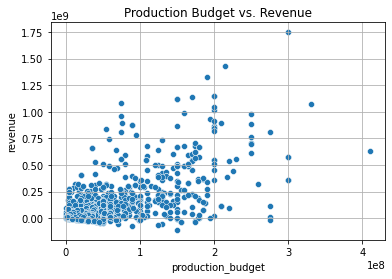

In [42]:
sns.scatterplot(x="production_budget", y="revenue", data=merged_movies)
plt.title('Production Budget vs. Revenue')
plt.grid(True)
plt.show()